In [1]:
#Inline magic command
%matplotlib inline
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv
import numpy as np
import statistics


In [2]:
#files to load

city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [3]:
#create city and ride data frames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
#Get the columns and rows that are not null; df.count method is used
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
#to ensure no null exists, using isnull and sum 
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#check the data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
#unique values for the type of city
sum(city_data_df["type"]=="Urban")
sum(city_data_df["type"]=="Rural")
#sum(city_data_df["type"]=="Suburban")

18

In [8]:
#ensure no null data in ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
#columns and rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
#data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
#merge the data frames; upon inspection it is clear city is the common column, let's use that column to merge the data frames

pyber_data_df = pd.merge(ride_data_df, city_data_df, how ="left", on = ["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:

#create data frame per type

urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]



In [13]:
#number of rides for urban, suburban and rural

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [14]:
#Average fare for each city in urban, suburban, rural

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [61]:
#average number of drives for each city in urban, suburban, rural

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]


14.0

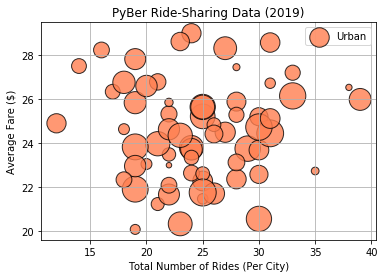

In [16]:
#Scatter plot for urban cities

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c= "coral", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

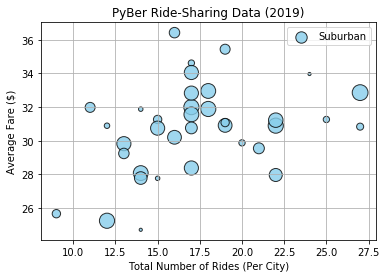

In [17]:
#Scatter plot for suburban cities

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c= "skyblue", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

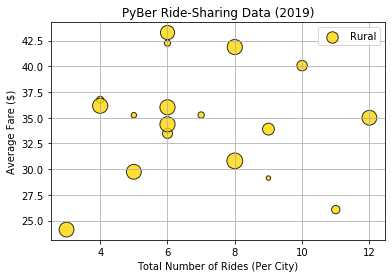

In [18]:
#Scatter plot for rural cities

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c= "gold", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

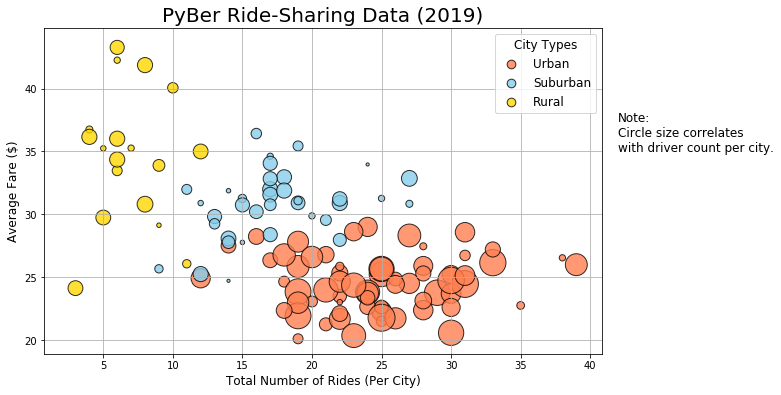

In [30]:
#add three charts to one cell to have one chart combining all these three.

plt.subplots(figsize=(10, 6))

plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c= "coral", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c= "skyblue", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c= "gold", edgecolor="black", linewidths = 1, alpha = 0.8, label = "Rural")


#add graph properties

plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize =12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)


#create a legend

lgnd = plt.legend(fontsize = "12", mode ="Expanded", 
                  scatterpoints = 1, loc = "best", title = "City Types")

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()

In [32]:
#measures of central tendency- data toward the middle of the dataset -> mean, median and mode

#using describe() function, summary statistics for cities

urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [77]:
#using desribe() function, summary statistics for ride count

urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [36]:
#mean of the ride count without summary statistics
round(urban_ride_count.mean(), 2)

24.62

In [39]:
round(urban_ride_count.median(), 2)

24.0

In [40]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [41]:
suburban_ride_count.mode()

0    17
dtype: int64

In [42]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [44]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count: .2f}.")

The mean for the ride counts for urban trips is  24.62.


In [46]:
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for the urban trips is{median_urban_ride_count: .2f}.")

The median for the ride counts for the urban trips is 24.00.


In [48]:
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for the urban trips is {mode_urban_ride_count}.")

The mode for the ride counts for the urban trips is ModeResult(mode=array([22]), count=array([7])).


In [49]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"{mode_suburban_ride_count}.")

ModeResult(mode=array([17]), count=array([7])).


In [51]:
mode_rural_ride_count =sts.mode(rural_ride_count)
print(f"{mode_rural_ride_count}.")

ModeResult(mode=array([6]), count=array([5])).


In [54]:
#Get fares for the cities- urban, suburban and rural

urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
#urban_fares.head()

In [53]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [55]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [56]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [63]:
#average riders per city - suburban

round(suburban_driver_count.mean(),0)

14.0

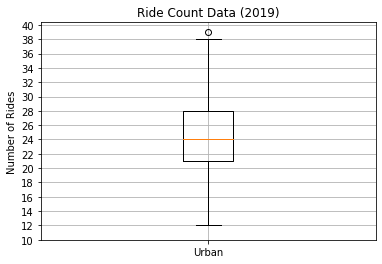

In [70]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

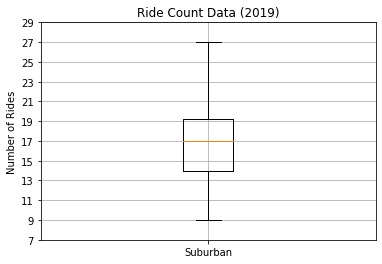

In [76]:
#box and whisker plot for suburban
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)
#add the title, y-axis label and grid

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(7,30, step =2.0))
ax.grid()
plt.show()

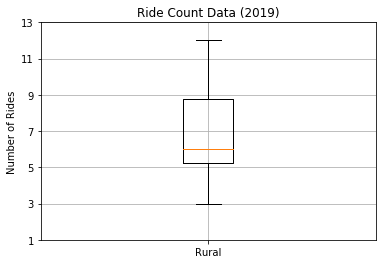

In [78]:
#box and whisker plot for rural
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)
#add the title, y-axis label and grid

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(1,15, step =2.0))
ax.grid()
plt.show()

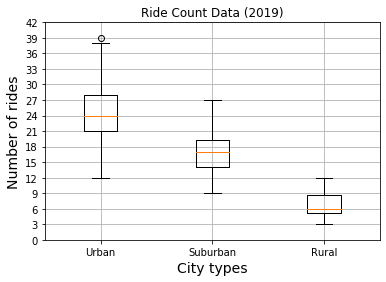

In [80]:
#all ride count box and whisker plots to the same graph

x_labels =["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots()
ax.boxplot(ride_count_data, labels = x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of rides", fontsize = 14)
ax.set_xlabel("City types", fontsize =14)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

#save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [81]:
#get the city that matches 39, the outlier from the above graph

urban_city_outlier = urban_ride_count[urban_ride_count ==39].index[0]

print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


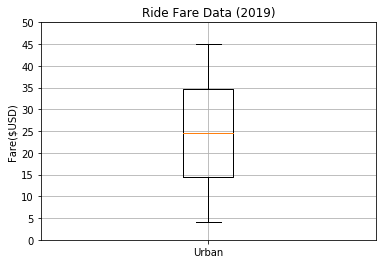

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [82]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

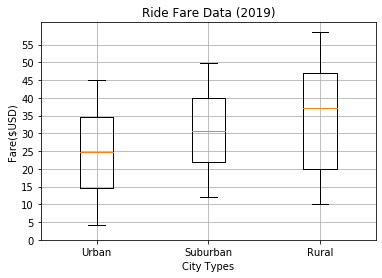

Summary Statistics
count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64
count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64


In [94]:
# Create a box-and-whisker plot for the urban, suburban and rural data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_xlabel("City Types")
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

#save the fig
plt.savefig("analysis/Fig3.png")
plt.show()
print("Summary Statistics")
print(f"{urban_fares.describe()}")
print(f"{suburban_fares.describe()}")
print(f"{rural_fares.describe()}")
#suburban_fares.describe()
#rural_fares.describe()


In [101]:
#Drivers data

urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]


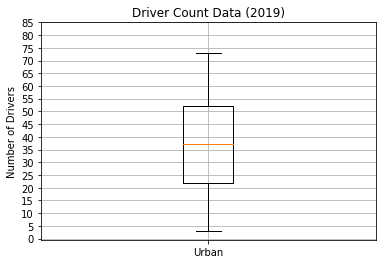

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [106]:
#box and whisker plot for urban driver count data

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels = x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


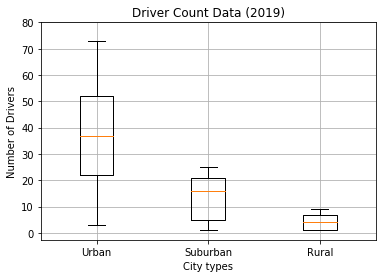

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [111]:
#box and whisker plot for urban, suburban, rural driver count data

x_labels = ["Urban", "Suburban", "Rural"]
driver_data= [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data, labels = x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_xlabel("City types")
ax.set_yticks(np.arange(0,90, step = 10.0))
ax.grid()

#save the figure
plt.savefig("analysis/Fig4.png")
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [116]:
#total fares for each city type

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [114]:
#get the sum of all fares

total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [118]:
#% fares by type

type_percents = 100 *sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

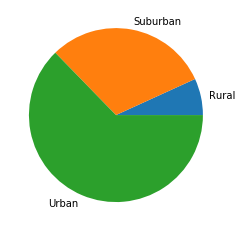

In [119]:
#pie chart

plt.pie(type_percents, labels = ["Rural", "Suburban", "Urban"])
plt.show()

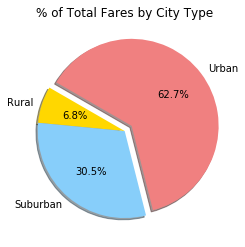

In [124]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

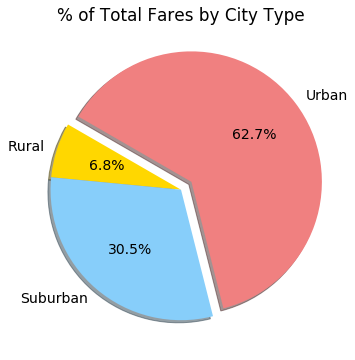

In [126]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 20
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [127]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

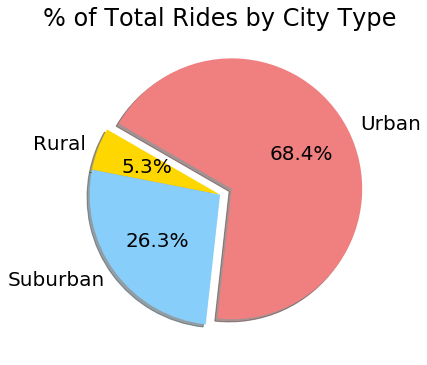

In [128]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()


In [132]:
#Calculate driver percentage

driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"]/pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

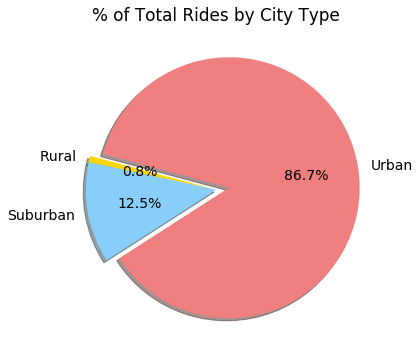

In [133]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()